<a href="https://colab.research.google.com/github/mitsouma/Deep-Learning_Labs/blob/main/introduction_practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### pip install --upgrade tensorflow

Following the release of deep learning libraries, higher-level API-like libraries came out, which sit on top of the deep learning libraries, like TensorFlow, which make building, testing, and tweaking models even more simple. One such library that has easily become the most popular is Keras.

Keras has become so popular, that it is now a superset, included with TensorFlow releases now! If you're familiar with Keras previously, you can still use it, but now you can use tensorflow.keras to call it. By that same token, if you find example code that uses Keras, you can use with the TensorFlow version of Keras too. In fact, you can just do something like:

The mathematical challenge for the artificial neural network is to best optimize thousands or millions or whatever number of weights you have, so that your output layer results in what you were hoping for. Solving for this problem, and building out the layers of our neural network model is exactly what TensorFlow is for. TensorFlow is used for all things "operations on tensors." A tensor in this case is nothing fancy. It's a multi-dimensional array.

To install TensorFlow, simply do a:



###





In [ ]:
import tensorflow.keras as keras


For this tutorial, we are going to be using TensorFlow version 1.10. You can figure out your version:

In [ ]:
import tensorflow as tf

print(tf.__version__)


1.11.0


Once we've got tensorflow imported, we can then begin to prepare our data, model it, and then train it. For the sake of simplicity, we'll be using the most common "hello world" example for deep learning, which is the mnist dataset. It's a dataset of hand-written digits, 0 through 9. It's 28x28 images of these hand-written digits. We will show an example of using outside data as well, but, for now, let's load in this data:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


What exactly do we have here? Let's take a quick look.


So the x_train data is the "features." In this case, the features are pixel values of the 28x28 images of these digits 0-9. The y_train is the label (is it a 0,1,2,3,4,5,6,7,8 or a 9?)

The testing variants of these variables is the "out of sample" examples that we will use. These are examples from our data that we're going to set aside, reserving them for testing the model.

Neural networks are exceptionally good at fitting to data, so much so that they will commonly over-fit the data. Our real hope is that the neural network doesn't just memorize our data and that it instead "generalizes" and learns the actual problem and patterns associated with it.

Let's look at this actual data:

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Alright, could we visualize this?

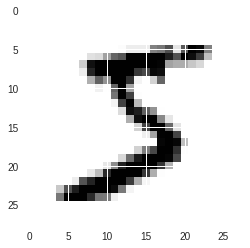

In [ ]:
import matplotlib.pyplot as plt
#normal charts inside notebooks
%matplotlib inline

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()


How about the value for y_train with the same index?



In [ ]:
print(y_train[0])

5


It's generally a good idea to "normalize" your data. This typically involves scaling the data to be between 0 and 1, or maybe -1 and positive 1. In our case, each "pixel" is a feature, and each feature currently ranges from 0 to 255. Not quite 0 to 1. Let's change that with a handy utility function:

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [ ]:
print(x_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

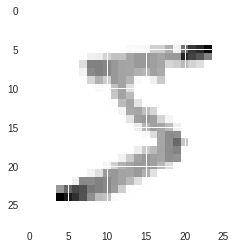

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()


# Now let's build our model!

In [ ]:
model = tf.keras.models.Sequential()

A sequential model is what you're going to use most of the time. It just means things are going to go in direct order. A feed forward model. No going backwards...for now.

Now, we'll pop in layers. Recall our neural network image? Was the input layer flat, or was it multi-dimensional? It was flat. So, we need to take this 28x28 image, and make it a flat 1x784. There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that.

In [ ]:
model.add(tf.keras.layers.Flatten())

This will serve as our input layer. It's going to take the data we throw at it, and just flatten it for us. Next, we want our hidden layers. We're going to go with the simplest neural network layer, which is just a Dense layer. This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node. Just like our image.

In [ ]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))


This layer has 128 units. The activation function is relu, short for rectified linear. Currently, relu is the activation function you should just default to. There are many more to test for sure, but, if you don't know what to use, use relu to start.

Let's add another identical layer for good measure.

In [ ]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))


Now, we're ready for an output layer:



In [ ]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


This is our final layer. It has 10 nodes. 1 node per possible number prediction. In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is. Great, our model is done.

Now we need to "compile" the model. This is where we pass the settings for actually optimizing/training the model we've defined.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Remember why we picked relu as an activation function? Same thing is true for the Adam optimizer. It's just a great default to start with.

Next, we have our loss metric. Loss is a calculation of error. A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss. Again, there are many choices, but some form of categorical crossentropy is a good start for a classification task like this.

Now, we fit!

In [ ]:
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 7s 124us/step - loss: 0.2624 - acc: 0.9241
Epoch 2/3
60000/60000 [==============================] - 7s 115us/step - loss: 0.1092 - acc: 0.9666
Epoch 3/3
60000/60000 [==============================] - 7s 114us/step - loss: 0.0735 - acc: 0.9767


As we train, we can see loss goes down (yay), and accuracy improves quite quickly to 98-99% (double yay!)

Now that's loss and accuracy for in-sample data. Getting a high accuracy and low loss might mean your model learned how to classify digits in general (it generalized)...or it simply memorized every single example you showed it (it overfit). This is why we need to test on out-of-sample data (data we didn't use to train the model).



In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)


10000/10000 [==============================] - 0s 33us/step
0.09391475263349712
0.9713


It's going to be very likely your accuracy out of sample is a bit worse, same with loss. In fact, it should be a red flag if it's identical, or better.

finally, make predictions!


In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(predictions)

[[1.1531731e-09 1.6657758e-08 4.3342610e-07 ... 9.9997044e-01
  7.1998265e-08 1.4766479e-07]
 [4.2890966e-10 6.9435482e-05 9.9988151e-01 ... 1.0250092e-08
  5.0797122e-09 2.4275922e-11]
 [3.9731293e-07 9.9911433e-01 5.0606963e-05 ... 4.6153678e-04
  2.6475886e-05 7.1926718e-07]
 ...
 [5.9835883e-09 1.7595082e-06 6.2936479e-08 ... 1.3065385e-04
  5.4760716e-05 6.7713583e-04]
 [5.9752274e-06 9.0162603e-06 1.2241945e-07 ... 3.1561780e-05
  1.2025710e-03 4.3655952e-08]
 [7.0423226e-08 5.0259255e-09 6.1181844e-08 ... 2.3204232e-10
  1.8224696e-08 4.8948740e-10]]


That sure doesn't start off as helpful, but recall these are probability distributions. We can get the actual number pretty simply:



In [ ]:
import numpy as np

print(np.argmax(predictions[0]))


7


There's your prediction, let's look at the input:


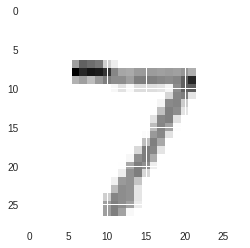

In [ ]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

Awesome! Okay, I think that covers all of the "quick start" types of things with Keras. This is just barely scratching the surface of what's available to you, so start poking around Tensorflow and Keras documentation.